#Import Package

In [ ]:
!pip install scikit-criteria==0.2.11

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 52 kB 562 kB/s 
     |████████████████████████████████| 14.2 MB 1.6 MB/s 
  Created wheel for scikit-criteria: filename=scikit_criteria-0.2.11-py3-none-any.whl size=116440 sha256=889be5c011d702ec560761aec1cdf4d3e51d691a6d25ff47e5ffd19cb21a8fd3
  Stored in directory: /root/.cache/pip/wheels/40/a6/77/757f8037a1f88402d20141e2470104c7b627338f99360d37dc
Successfully built scikit-criteria


In [ ]:
#import package 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import minmax_scale
%matplotlib inline
# !pip install -U scikit-criteria
from skcriteria import Data, MIN, MAX

# Load Data
- Data Gizi tahun 2017
- Data Pernikahan Dini tahun 2017
- Data Indeks Kesehatan tahun 2017
- Data Fasilitas layanan kesehatan tahun 2017

In [ ]:
# Data Gizi Buruk 2016 - 2018
url = 'https://raw.githubusercontent.com/shofi78/BaRaYa-Dashboard/main/Data%20Set/jumlah_bayi_bergizi_buruk_berdasarkan_kabupatenkota_data_2016_2018.csv'
gizi_buruk = pd.read_csv(url,index_col=[0])

In [ ]:
gizi_buruk_2017 = gizi_buruk[gizi_buruk['tahun'] == 2017][['nama_kabupaten_kota','jumlah_bayi']].reset_index(drop=True)  #diambil kolom yang dibutuhkan saja
gizi_buruk_2017.head()

In [ ]:
# Data Pernikahan Dini Tahun 2017
url = 'https://raw.githubusercontent.com/shofi78/BaRaYa-Dashboard/main/Data%20Set/jumlah_perkawinan_usia_16_19_tahun_berdasarkan_jenis_kelamin_data_2017.csv'
usia_nikah_2017 = pd.read_csv(url,index_col=[0])

In [ ]:
data_pernikahan_dini = usia_nikah_2017.groupby("nama_kabupaten_kota")["jumlah"].sum()

In [ ]:
data_pernikahan_dini = pd.DataFrame({'nama_kabupaten_kota':data_pernikahan_dini.index, 'jumlah_pernikahan_dini':data_pernikahan_dini.values})

In [ ]:
data_pernikahan_dini.head()

In [ ]:
# Data Indeks Kesehatan Tahun 2017
url = 'https://raw.githubusercontent.com/shofi78/BaRaYa-Dashboard/main/Data%20Set/indeks_kesehatan_berdasarkan_kabupatenkota_data_2010_2021.csv'
indeks_kesehatan = pd.read_csv(url,index_col=0,parse_dates=[0])

In [ ]:
indeks_kesehatan_2017 = indeks_kesehatan[indeks_kesehatan['tahun']== 2017][['nama_kabupaten_kota','indeks_kesehatan']].reset_index(drop=True)  #diambil kolom yang dibutuhkan saja
indeks_kesehatan_2017.head()

,nama_kabupaten_kota,indeks_kesehatan
0,KABUPATEN BOGOR,78.00
1,KABUPATEN SUKABUMI,77.32
2,KABUPATEN CIANJUR,76.14
3,KABUPATEN BANDUNG,81.74
4,KABUPATEN GARUT,78.22


In [ ]:
# Data fasilitas Layanan Kesehatan Tahun 2017
url = 'https://raw.githubusercontent.com/shofi78/BaRaYa-Dashboard/main/Data%20Set/jumlah_fasilitas_kesehatan_kabupatenkota_data_2017.csv'
fasilkes_2017 = pd.read_csv(url, sep=';')

In [ ]:
fasilkes_2017['total_fasilkes']=fasilkes_2017.sum(axis=1)
fasilkes_2017 = fasilkes_2017.rename({'Jumlah Fasilitas Kesehatan': 'nama_kabupaten_kota'}, axis=1)[['nama_kabupaten_kota','total_fasilkes']].drop([0], axis=0).reset_index(drop=True)
fasilkes_2017.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


,nama_kabupaten_kota,total_fasilkes
0,Bogor,5183
1,Sukabumi,3511
2,Cianjur,2960
3,Bandung,4353
4,Garut,4254


In [ ]:
# Menyeragamkan data pada kolom kabupaten_kota
fasilkes_2017['nama_kabupaten_kota'] = fasilkes_2017['nama_kabupaten_kota'].str.upper().str.replace(r'^(?!.*KOTA).*$', r'KABUPATEN \g<0>')
fasilkes_2017.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


,nama_kabupaten_kota,total_fasilkes
0,KABUPATEN BOGOR,5183
1,KABUPATEN SUKABUMI,3511
2,KABUPATEN CIANJUR,2960
3,KABUPATEN BANDUNG,4353
4,KABUPATEN GARUT,4254


# Proses Wrangling 
- Menggabungkan/merge data semua kriteria yang digunakan
- Membuat perankingan dengan Multi Criteria Decision Making menggunakan **skcriteria** package
- Menggabungkan data hasil wrangling dengan data perankingan
- Menentukan kelompok kabupaten/kota (tinggi, sedang, rendah) dengan melihat distribusinya

### Menggabungkan data kriteria/indikator yang digunakan

In [ ]:
data_frames = [gizi_buruk_2017,data_pernikahan_dini, indeks_kesehatan_2017, fasilkes_2017]

In [ ]:
from functools import reduce

In [ ]:
df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['nama_kabupaten_kota'],
                                            how='left'), data_frames)
df_merged

,nama_kabupaten_kota,jumlah_bayi,jumlah_pernikahan_dini,indeks_kesehatan,total_fasilkes
0,KABUPATEN BOGOR,3120,533,78.00,5183
1,KABUPATEN SUKABUMI,2546,1154,77.32,3511
2,KABUPATEN CIANJUR,1808,1221,76.14,2960
3,KABUPATEN BANDUNG,611,1033,81.74,4353
4,KABUPATEN GARUT,195,1087,78.22,4254
5,KABUPATEN TASIKMALAYA,1200,1215,74.94,2402
6,KABUPATEN CIAMIS,212,759,78.57,1682
7,KABUPATEN KUNINGAN,299,717,81.35,1486
8,KABUPATEN CIREBON,1853,799,79.22,2666
9,KABUPATEN MAJALENGKA,333,815,75.98,1538


### Multi Criteria Decision Making (Ranking)

Kriteria :
- Jumlah Bayi: jumlah bayi yang menderita gizi buruk 
- Jumlah Penikahan Dini: jumlah pernikahan dini (usia < 19 tahun) yang terjadi 
- Indeks Kesehatan: nilai (dalam poin) indeks kesehatan masyarakat secara umum
- Total Fasilkes: jumlah fasilitas kesehatan (posyandu,puskesmas keliling, dan balai pengobatan)

In [ ]:
# Menyiapkan data berdasarkan criteria yang dipilih

criteria_data = Data(
    df_merged.iloc[:, 1:],                      # the pandas dataframe
    [MIN, MIN, MAX, MAX],                       # direction of goodness for each column
    anames = df_merged['nama_kabupaten_kota'], # each entity's name
    cnames = df_merged.columns[1:]             # column name
    )
criteria_data

ALT./CRIT.,jumlah_bayi (min),jumlah_pernikahan_dini (min),indeks_kesehatan (max),total_fasilkes (max)
KABUPATEN BOGOR,3120,533,78,5183
KABUPATEN SUKABUMI,2546,1154,77.32,3511
KABUPATEN CIANJUR,1808,1221,76.14,2960
KABUPATEN BANDUNG,611,1033,81.74,4353
KABUPATEN GARUT,195,1087,78.22,4254
KABUPATEN TASIKMALAYA,1200,1215,74.94,2402
KABUPATEN CIAMIS,212,759,78.57,1682
KABUPATEN KUNINGAN,299,717,81.35,1486
KABUPATEN CIREBON,1853,799,79.22,2666
KABUPATEN MAJALENGKA,333,815,75.98,1538


In [ ]:
# Melakukan perankingan 

from skcriteria.madm import simple
#weighted sum
dm = simple.WeightedSum(mnorm='sum')
dec = dm.decide(criteria_data)
dec

ALT./CRIT.,jumlah_bayi (min),jumlah_pernikahan_dini (min),indeks_kesehatan (max),total_fasilkes (max),Rank
KABUPATEN BOGOR,3120,533,78,5183,23
KABUPATEN SUKABUMI,2546,1154,77.32,3511,27
KABUPATEN CIANJUR,1808,1221,76.14,2960,26
KABUPATEN BANDUNG,611,1033,81.74,4353,21
KABUPATEN GARUT,195,1087,78.22,4254,9
KABUPATEN TASIKMALAYA,1200,1215,74.94,2402,25
KABUPATEN CIAMIS,212,759,78.57,1682,8
KABUPATEN KUNINGAN,299,717,81.35,1486,13
KABUPATEN CIREBON,1853,799,79.22,2666,24
KABUPATEN MAJALENGKA,333,815,75.98,1538,14


In [ ]:
# Menampilkan Bayi Juara score (BJ score) yang diperoleh
bj_score = dec.e_.points
bj_score

array([ 43.55887501,  24.63470645,  26.60427107,  49.43531134,
       112.32930485,  31.79991096, 112.72067058,  89.16057275,
        35.01540068,  79.55557161,  57.6147111 ,  45.16383193,
        54.51383542,  72.47465946,  51.571562  ,  77.36580558,
        72.83885302, 335.37151761,  96.66040473, 260.21092886,
        96.8097067 , 169.92014346, 138.35649948, 203.50122477,
       172.41831287, 100.41456976, 364.28559294])

### Menggabungkan data hasil wrangling dan perankingan

In [ ]:
# Mengubah tipe data dari array to series terlebih dahulu
rank = pd.Series(dec.rank_, name='rank')
bj_score = pd.Series(dec.e_.points, name='bj_score')

# Menggabungkan data 
df_rank_bj = pd.concat([df_merged,rank,bj_score],axis=1)
df_rank_bj

,nama_kabupaten_kota,jumlah_bayi,jumlah_pernikahan_dini,indeks_kesehatan,total_fasilkes,rank,bj_score
0,KABUPATEN BOGOR,3120,533,78.00,5183,23,43.558875
1,KABUPATEN SUKABUMI,2546,1154,77.32,3511,27,24.634706
2,KABUPATEN CIANJUR,1808,1221,76.14,2960,26,26.604271
3,KABUPATEN BANDUNG,611,1033,81.74,4353,21,49.435311
4,KABUPATEN GARUT,195,1087,78.22,4254,9,112.329305
5,KABUPATEN TASIKMALAYA,1200,1215,74.94,2402,25,31.799911
6,KABUPATEN CIAMIS,212,759,78.57,1682,8,112.720671
7,KABUPATEN KUNINGAN,299,717,81.35,1486,13,89.160573
8,KABUPATEN CIREBON,1853,799,79.22,2666,24,35.015401
9,KABUPATEN MAJALENGKA,333,815,75.98,1538,14,79.555572


In [ ]:
# Mengurutkan ranking dari tertinggi ke terendah
df_rank_bj.sort_values(by=['rank'], ignore_index=True, inplace=True)
df_rank_bj

,nama_kabupaten_kota,jumlah_bayi,jumlah_pernikahan_dini,indeks_kesehatan,total_fasilkes,rank,bj_score
0,KOTA BANJAR,87,130,77.52,228,1,364.285593
1,KABUPATEN PANGANDARAN,69,285,77.78,552,2,335.371518
2,KOTA SUKABUMI,115,198,79.92,488,3,260.210929
3,KOTA DEPOK,389,128,83.14,1226,4,203.501225
4,KOTA CIMAHI,193,258,82.48,455,5,172.418313
5,KOTA CIREBON,216,235,79.78,382,6,169.920143
6,KOTA BEKASI,586,187,84.05,1963,7,138.356499
7,KABUPATEN CIAMIS,212,759,78.57,1682,8,112.720671
8,KABUPATEN GARUT,195,1087,78.22,4254,9,112.329305
9,KOTA TASIKMALAYA,463,329,79.20,937,10,100.414570


In [ ]:
# save to excel dan download untuk kebutuhan visualisasi
from google.colab import files
df_rank_bj.to_excel('perankingan_bayi_juara_jabar_2017.xlsx')
files.download('perankingan_bayi_juara_jabar_2017.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Distribusi BJ Score untuk menentukan kabupaten/kota mana yang termasuk tinggi, sedang atau rendah

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


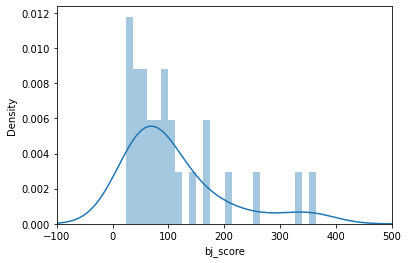

In [ ]:
# Distribusi BJ score
fig, ax = plt.subplots()
sns.distplot(df_rank_bj['bj_score'], bins=27, ax=ax)
ax.set_xlim(-100,500)
plt.show()

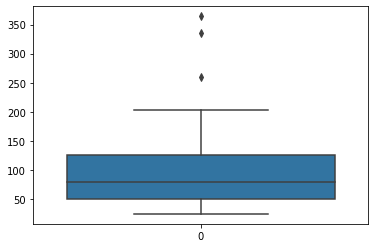

In [ ]:
sns.boxplot(data=df_rank_bj['bj_score'])
plt.show()

In [ ]:
df_rank_bj['bj_score'].describe()


count     27.000000
mean     110.159509
std       89.490891
min       24.634706
25%       50.503437
50%       79.555572
75%      125.538585
max      364.285593
Name: bj_score, dtype: float64

In [ ]:
df_rank_bj.columns

Index(['nama_kabupaten_kota', 'jumlah_bayi', 'jumlah_pernikahan_dini',
       'indeks_kesehatan', 'total_fasilkes', 'rank', 'bj_score'],
      dtype='object')

In [ ]:
df_rank_bj['jumlah_bayi'].describe()

count      27.000000
mean      677.407407
std       768.072325
min        69.000000
25%       220.000000
50%       452.000000
75%       585.500000
max      3120.000000
Name: jumlah_bayi, dtype: float64

In [ ]:
# Mencari Median setiap indikator

In [ ]:
df_rank_bj['jumlah_bayi'].median()

452.0

In [ ]:
df_rank_bj['jumlah_pernikahan_dini'].median()

759.0

In [ ]:
df_rank_bj['indeks_kesehatan'].median()

79.45

In [ ]:
df_rank_bj['total_fasilkes'].median()

1885.0

# SELESAI